In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:29<00:00, 23.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
# Ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [5]:
# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 90
Classes: ['jellyfish', 'beetle', 'lobster', 'eagle', 'oyster', 'deer', 'goose', 'duck', 'fly', 'lion', 'bison', 'hyena', 'flamingo', 'bear', 'okapi', 'wombat', 'otter', 'leopard', 'raccoon', 'goldfish', 'turkey', 'swan', 'hare', 'hedgehog', 'crow', 'whale', 'sandpiper', 'pig', 'mouse', 'woodpecker', 'starfish', 'porcupine', 'hippopotamus', 'hornbill', 'bee', 'reindeer', 'squirrel', 'parrot', 'octopus', 'boar', 'chimpanzee', 'lizard', 'panda', 'caterpillar', 'seahorse', 'gorilla', 'zebra', 'goat', 'cockroach', 'cat', 'tiger', 'rhinoceros', 'ox', 'badger', 'bat', 'hummingbird', 'horse', 'pelecaniformes', 'antelope', 'shark', 'coyote', 'possum', 'ladybugs', 'elephant', 'grasshopper', 'hamster', 'fox', 'cow', 'dragonfly', 'pigeon', 'mosquito', 'moth', 'butterfly', 'rat', 'kangaroo', 'donkey', 'koala', 'owl', 'orangutan', 'dolphin', 'sheep', 'squid', 'sparrow', 'turtle', 'snake', 'dog', 'wolf', 'seal', 'crab', 'penguin']


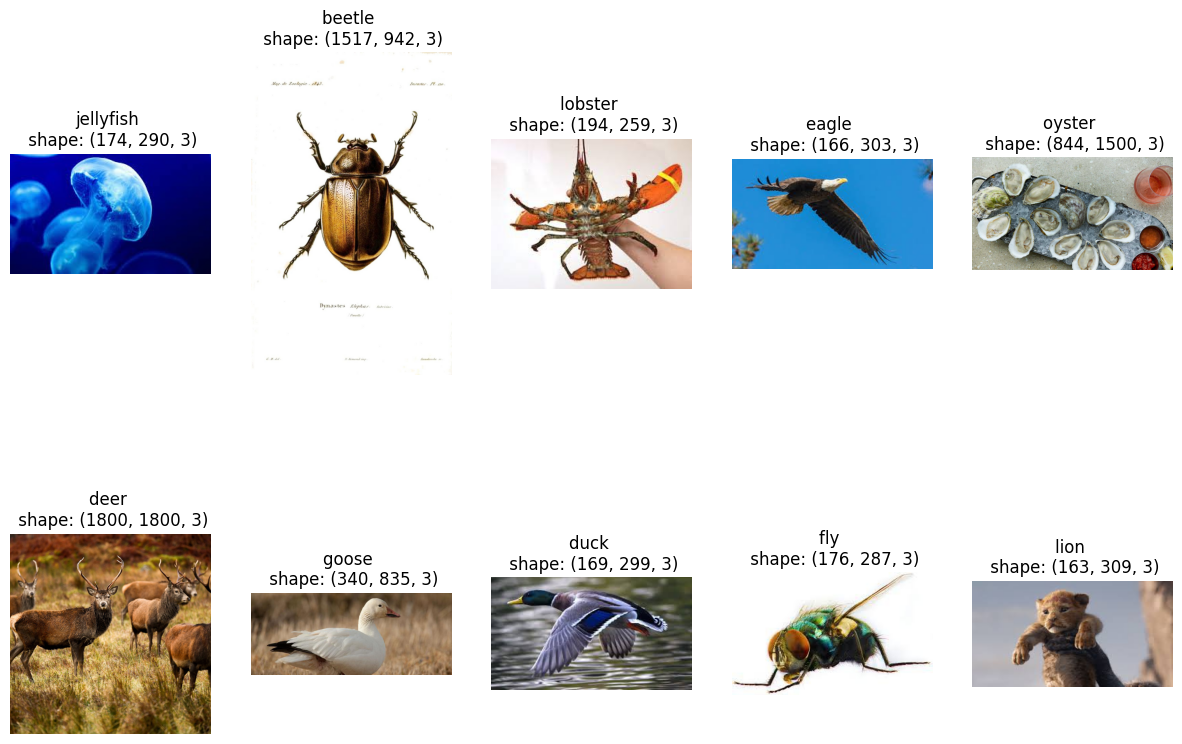

In [6]:
# Visualize some sample images form the dataset
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()
